# Image search engine with Python and OpenCV

When building an image search engine we will first have to index our dataset. Indexing a dataset is the process of quantifying our dataset by utilizing an image descriptor to extract features from each image.

An image descriptor defines the algorithm that we are utilizing to describe our image.

For example:

- The mean and standard deviation of each Red, Green, and Blue channel, respectively,  
- The statistical moments of the image to characterize shape.  
- The gradient magnitude and orientation to describe both shape and texture.  
- The important takeaway here is that the image descriptor governs how the image is quantified.  

Features, on the other hand, are the output of an image descriptor. When you put an image into an image descriptor, you will get features out the other end.  

In the most basic terms, features (or feature vectors) are just a list of numbers used to abstractly represent and quantify images.  

Check out the original source https://www.pyimagesearch.com/2014/12/01/complete-guide-building-image-search-engine-python-opencv/


In [4]:
from pyimagesearch.imageutils import display
from pyimagesearch.colordescriptor import ColorDescriptor
from pyimagesearch.searcher import Searcher
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2
import glob

## Extracting Features from Our Dataset
extract  features (i.e. color histograms) from each image in our dataset. The process of extracting features and storing them on persistent storage is commonly called “indexing”.


For our image descriptor, we are going to divide our image into five different regions: (1) the top-left corner, (2) the top-right corner, (3) the bottom-right corner, (4) the bottom-left corner, and finally (5) the center of the image.

By utilizing these regions we’ll be able to mimic a crude form of localization, being able to represent our above beach image as having shades of blue sky in the top-left and top-right corners, brown sand in the bottom-left and bottom-right corners, and then a combination of blue sky and brown sand in the center region.
 
![alt text](https://pyimagesearch.com/wp-content/uploads/2014/11/image_segments.jpg "Segment")


In [5]:
# initialize the color descriptor
cd = ColorDescriptor((8, 12, 3))

# open the output index file for writing
output = open("search-image-index.csv", "w")

# use glob to grab the image paths and loop over them
for imagePath in glob.glob("images/dataset-search-image/" + "/*.png"):
	# extract the image ID (i.e. the unique filename) from the image
	# path and load the image itself
	imageID = imagePath[imagePath.rfind("/") + 1:]
	image = cv2.imread(imagePath)

	# describe the image
	features = cd.describe(image)

	# write the features to file
	features = [str(f) for f in features]
	output.write("%s,%s\n" % (imageID, ",".join(features)))

# close the index file
output.close()

## The Searcher

Query image


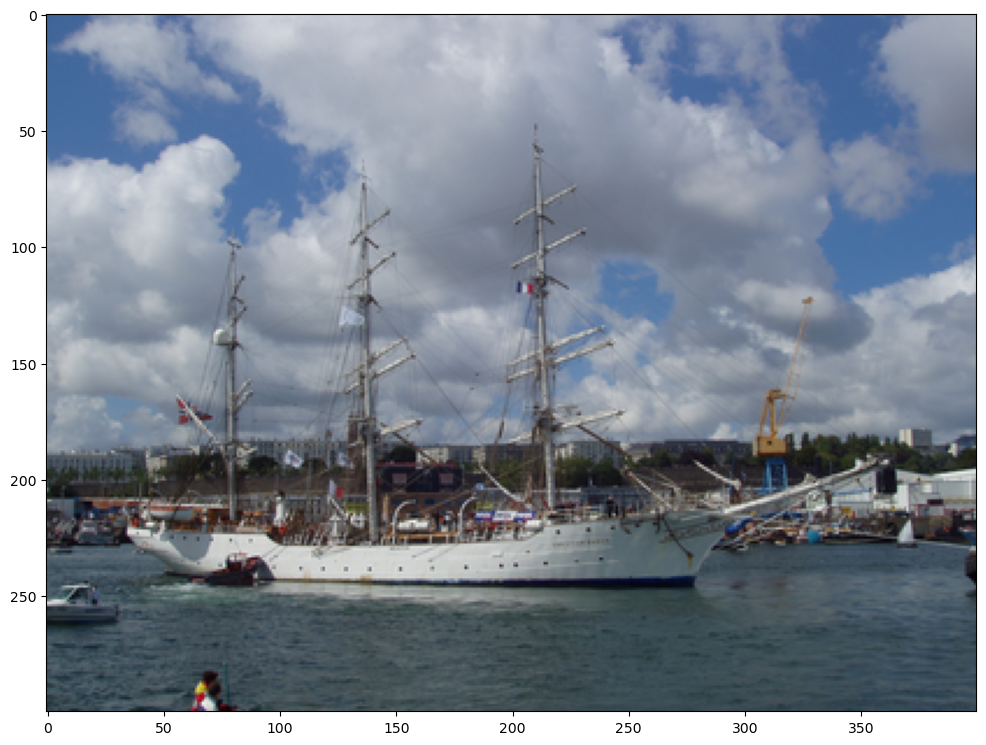

In [6]:
all_results = []
# initialize the image descriptor
cd = ColorDescriptor((8, 12, 3))

# load the query image and describe it
query = cv2.imread("images/queries/123600.png")
features = cd.describe(query)

# perform the search
searcher = Searcher("search-image-index.csv")
results = searcher.search(features)
all_results.append(results)
print("Query image")
display(query)

In [7]:

print("Results")
# loop over the results
for (score, resultID) in results:
	# load the result image and display it
	result = cv2.imread("images/dataset-search-image" + "/" + resultID)
	display(result)

Results


Query image


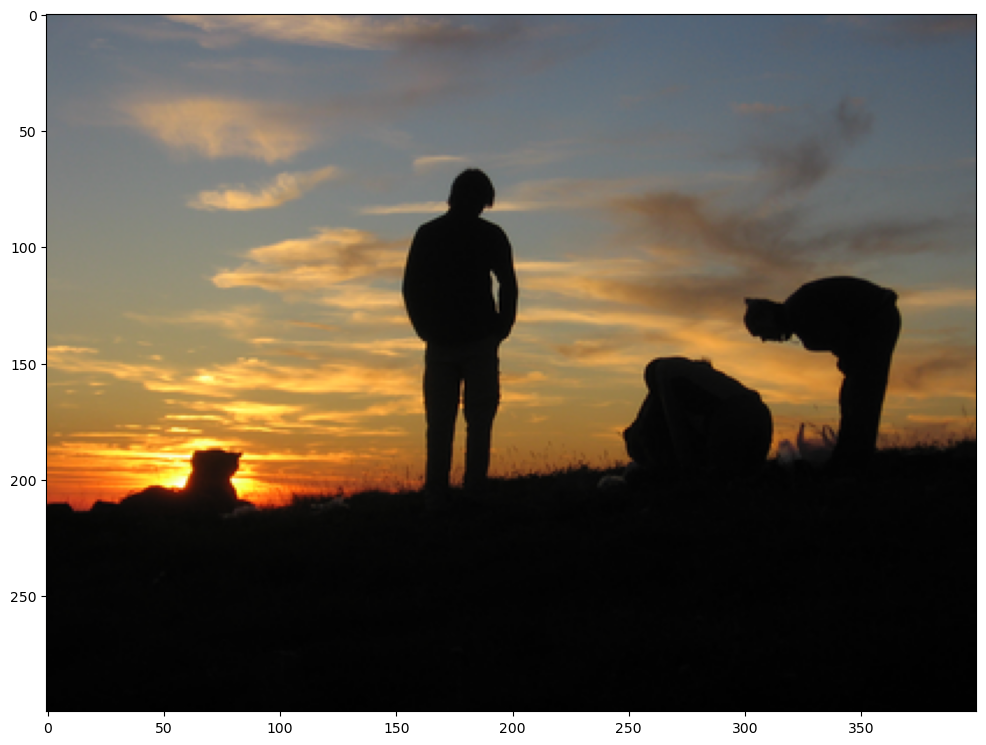

In [8]:

# load the query image and describe it
query = cv2.imread("images/queries/127502.png")
features = cd.describe(query)

# perform the search
searcher = Searcher("search-image-index.csv")
results = searcher.search(features)
all_results.append(results)
print("Query image")
display(query)

In [9]:

print("Results")
# loop over the results
for (score, resultID) in results:
	# load the result image and display it
	result = cv2.imread("images/dataset-search-image" + "/" + resultID)
	display(result)

Results


Query image


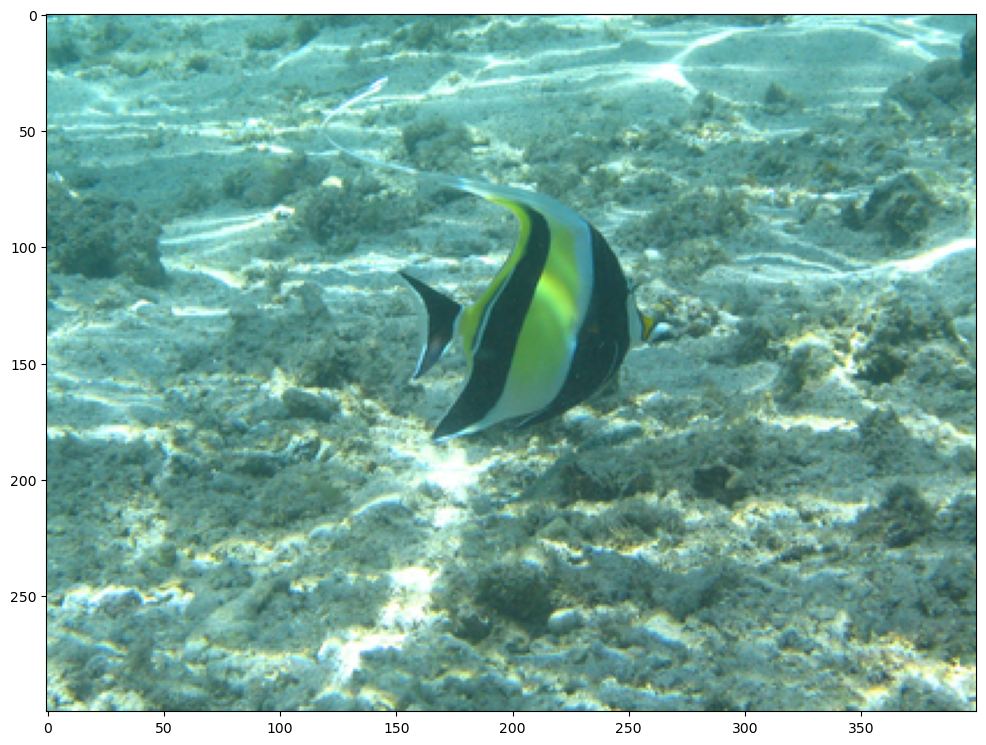

In [10]:

# load the query image and describe it
query = cv2.imread("images/queries/103100.png")
features = cd.describe(query)

# perform the search
searcher = Searcher("search-image-index.csv")
results = searcher.search(features)
all_results.append(results)
print("Query image")
display(query)

In [11]:
print("Results")
# loop over the results
for (score, resultID) in results:
	# load the result image and display it
	result = cv2.imread("images/dataset-search-image" + "/" + resultID)
	display(result)

Results


Query image


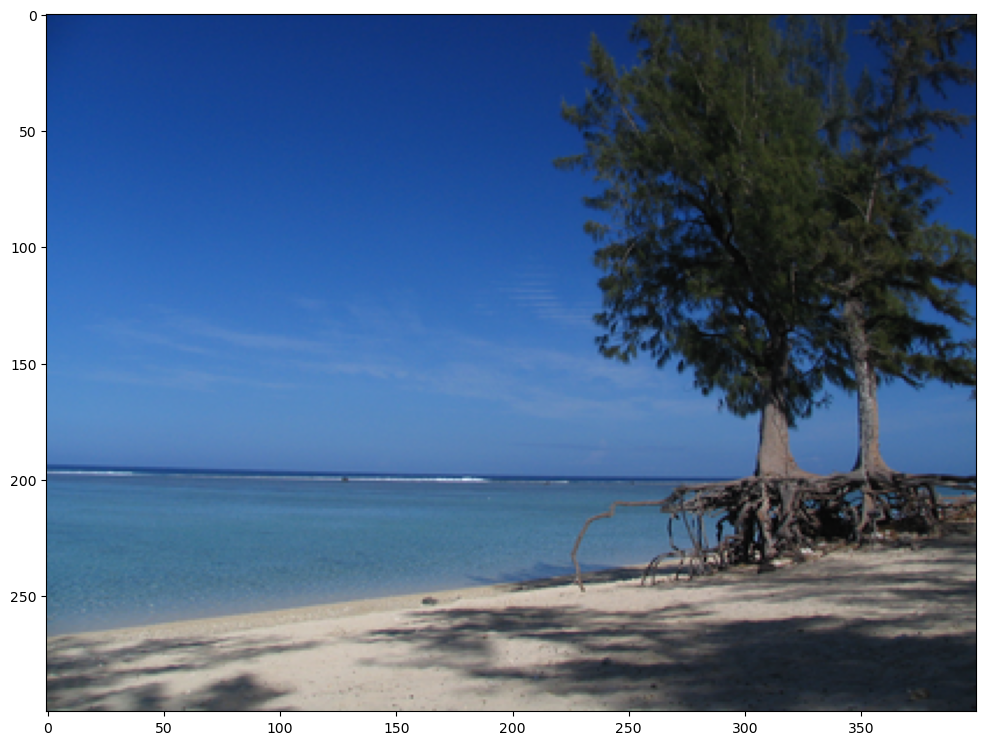

In [12]:
# load the query image and describe it
query = cv2.imread("images/queries/103300.png")
features = cd.describe(query)

# perform the search
searcher = Searcher("search-image-index.csv")
results = searcher.search(features)
all_results.append(results)
print("Query image")
display(query)

In [13]:
print("Results")
# loop over the results
for (score, resultID) in results:
	# load the result image and display it
	result = cv2.imread("images/dataset-search-image" + "/" + resultID)
	display(result)

Results
